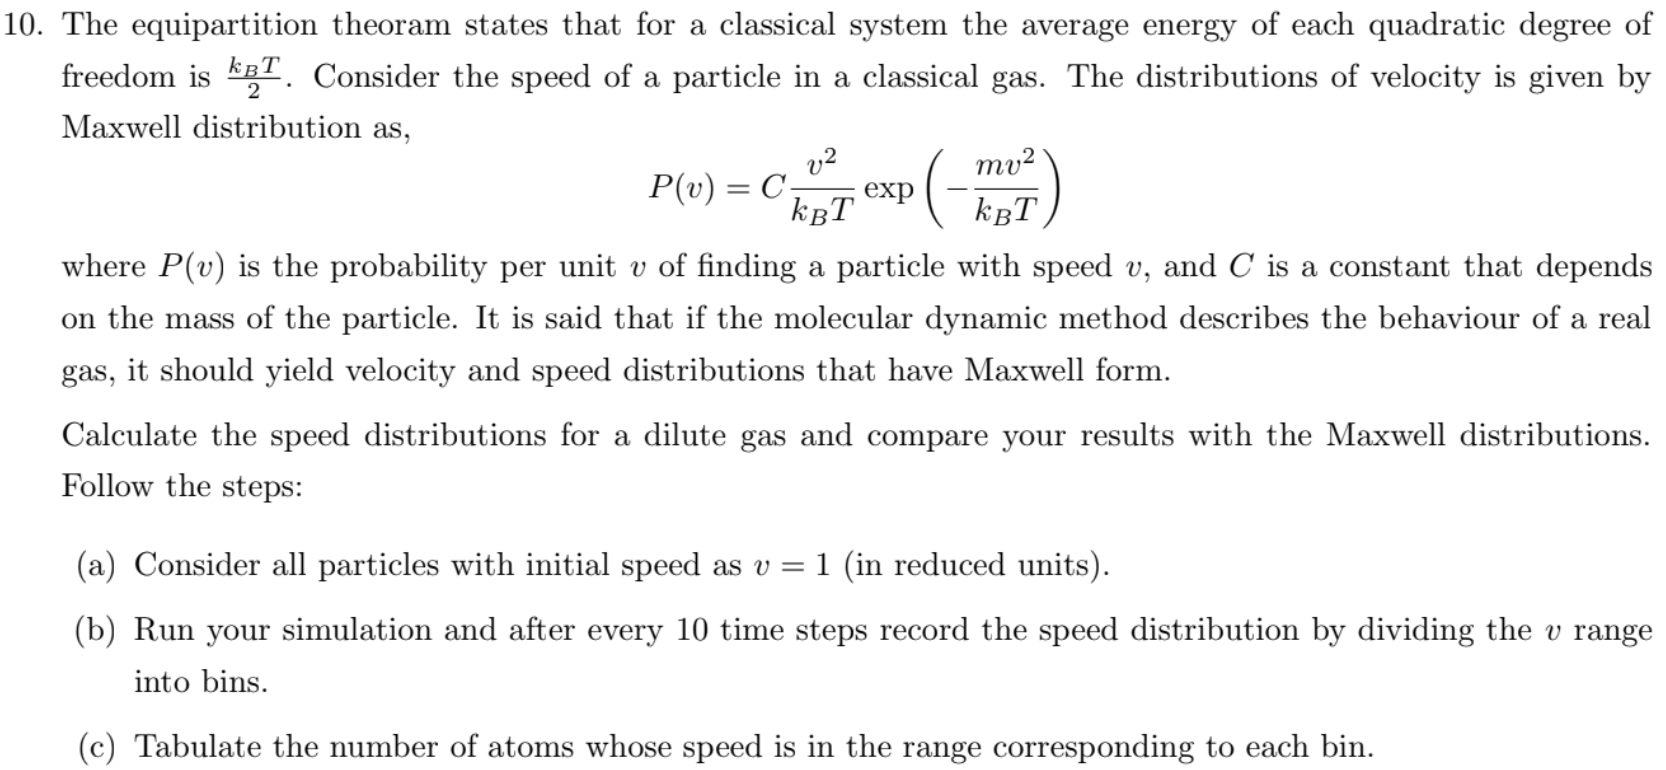

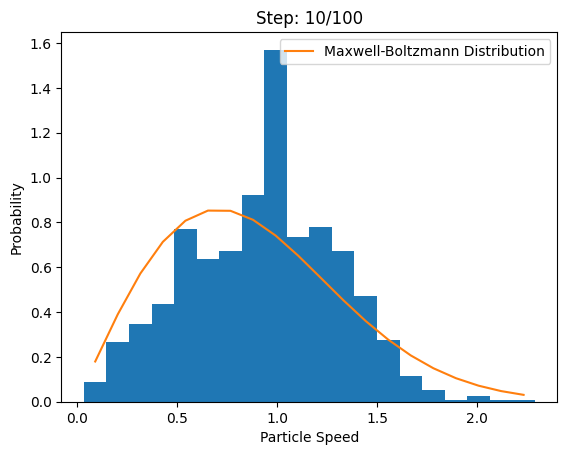

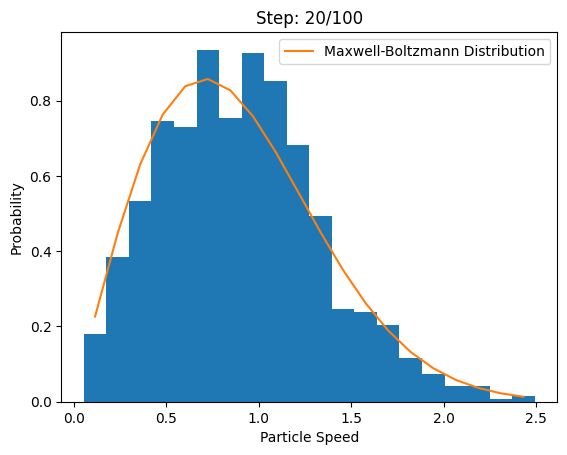

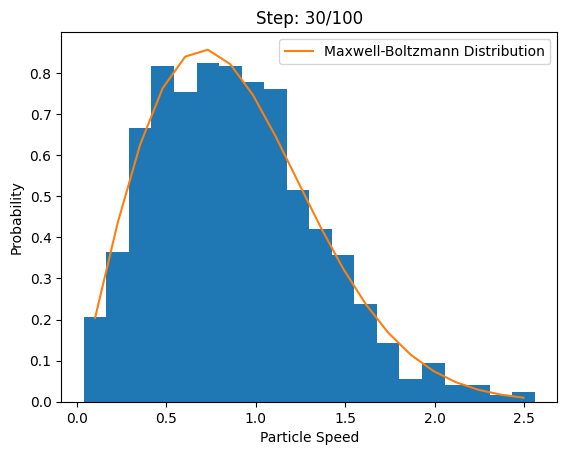

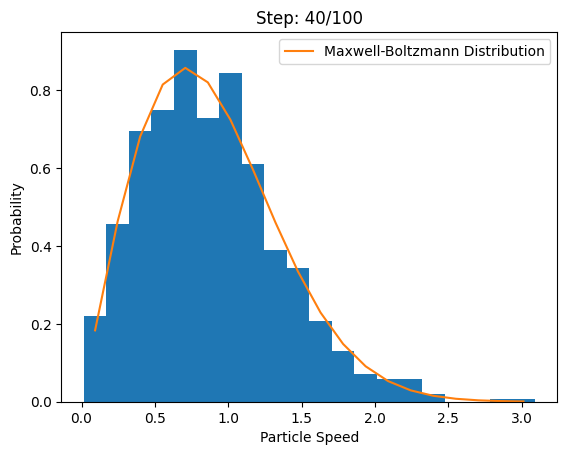

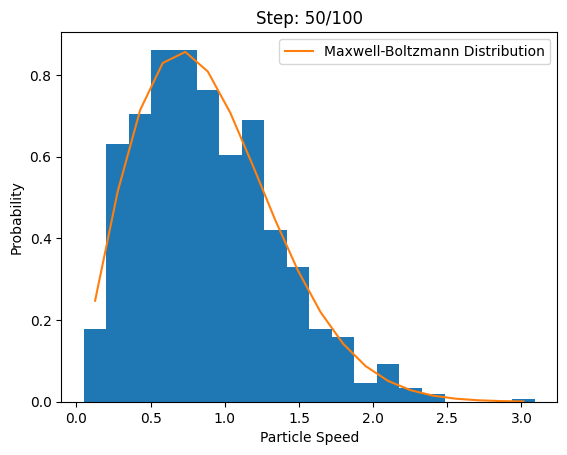

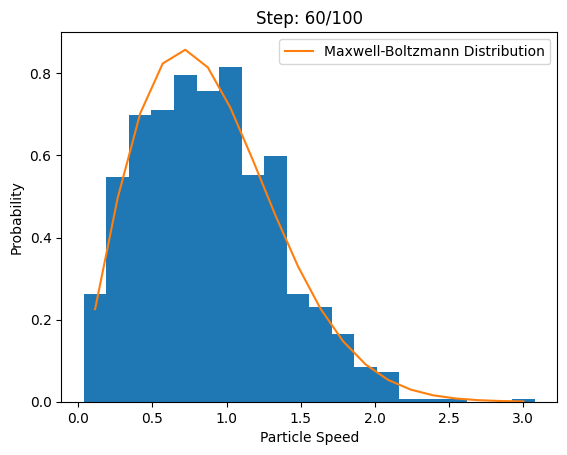

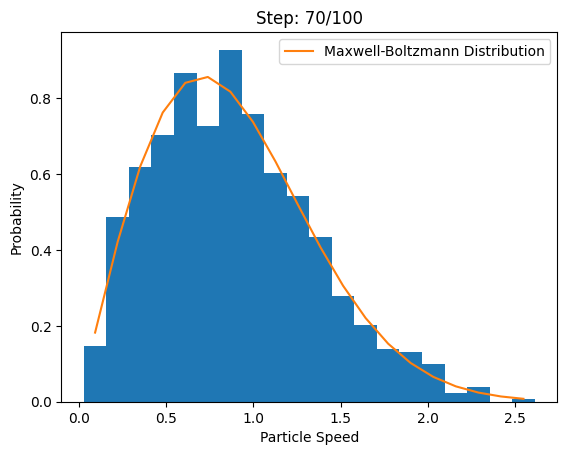

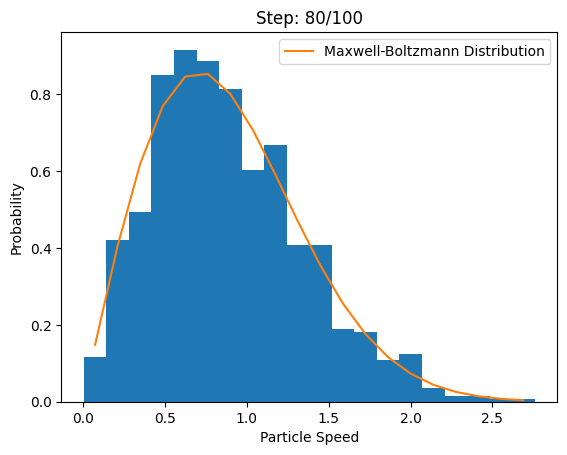

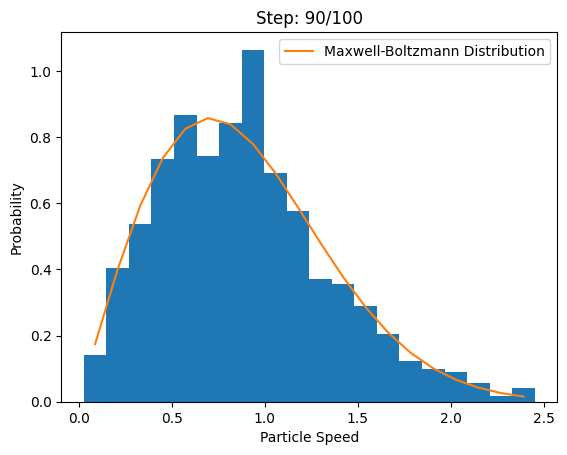

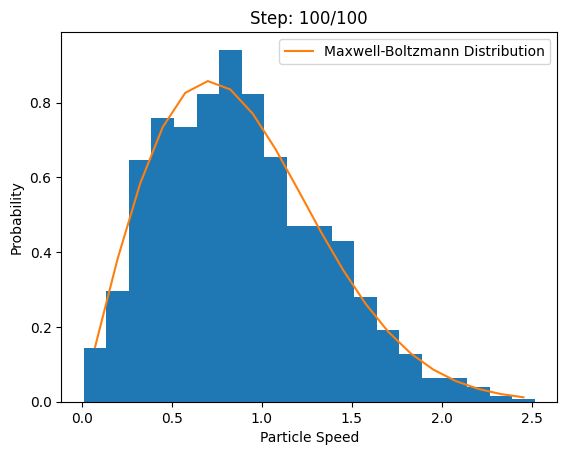

In [36]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

def initialize_particle(initial_velocity, particle_radius):
    x, y = random.random(), random.random()
    theta = 2 * math.pi * random.random()
    vx, vy = initial_velocity * math.cos(theta), initial_velocity * math.sin(theta)
    return ((x, y), (vx, vy), particle_radius)

def move_particle(position, velocity, dt):
    new_pos = ((position[0] + velocity[0] * dt) % 1, (position[1] + velocity[1] * dt) % 1)
    return new_pos

def distance_between(position1, position2):
    return math.sqrt((position1[0] - position2[0])**2 + (position1[1] - position2[1])**2)

def dot_product(vector1, vector2):
    return vector1[0] * vector2[0] + vector1[1] * vector2[1]

def initialize_simulation(N, particle_radius, v0):
    particles = [initialize_particle(v0, particle_radius) for _ in range(N)]
    return particles, 0

def move_simulation(particles, dt, particle_radius):
    new_particles = []
    for particle in particles:
        position, velocity, radius = particle
        new_pos = move_particle(position, velocity, dt)
        new_particles.append((new_pos, velocity, radius))

    collisions = []
    for i in range(len(new_particles)):
        pi = new_particles[i]
        for j in range(i+1, len(new_particles)):
            pj = new_particles[j]
            if distance_between(pi[0], pj[0]) < 2 * particle_radius:
                collisions.append((i, j))

    for i, j in collisions:
        p1, p2 = new_particles[i], new_particles[j]
        r1, r2 = p1[0], p2[0]
        v1, v2 = p1[1], p2[1]
        dr, dv = (r2[0] - r1[0], r2[1] - r1[1]), (v2[0] - v1[0], v2[1] - v1[1])
        dv_dot_dr = dot_product(dv, dr)
        d = distance_between(r1, r2) ** 2
        new_particles[i] = ((r1[0], r1[1]), (v1[0] - dv_dot_dr / d * (r1[0] - r2[0]), v1[1] - dv_dot_dr / d * (r1[1] - r2[1])), particle_radius)
        new_particles[j] = ((r2[0], r2[1]), (v2[0] - dv_dot_dr / d * (r2[0] - r1[0]), v2[1] - dv_dot_dr / d * (r2[1] - r1[1])), particle_radius)

    return new_particles

N = 1000  # number of particles
particle_radius = 0.005
v0 = 1
dt = 0.02

particles, t = initialize_simulation(N, particle_radius, v0)

iter_max = 100
iter_per_10 = iter_max // 10

for i in range(iter_max+1):
    if not i % iter_per_10 and i != 0:
        num_bins = len(particles) // 50
        hist, bins, _ = plt.hist([math.sqrt(p[1][0]**2 + p[1][1]**2) for p in particles], num_bins, density=True)
        v = (bins[1:] + bins[:-1]) / 2
        kinetic_energy = v0**2 / 2
        a = 1 / 2 / kinetic_energy
        f = 2 * a * v * np.exp(-a * v**2)
        plt.plot(v, f, label='Maxwell-Boltzmann Distribution')
        plt.xlabel('Particle Speed')
        plt.ylabel('Probability')
        plt.legend()
        plt.title(f'Step: {i}/{iter_max}')
        plt.show()

    particles = move_simulation(particles, dt, particle_radius)
